## Name - Amogh Chaube
## Task 3 - EDA for Retail Store

In [19]:
# importing all the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


In [18]:
data_1 = pd.read_csv('C:/Users/Amogh/Downloads/SampleSuperstore.csv')

In [25]:
data_1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
data_1.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [22]:
# Assesing the data types
data_1.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [23]:
# Total number of rows and columns
data_1.shape

(9994, 13)

In [32]:
# Finding the number of duplicate rows
duplicate_rows_data_1 = data_1[data_1.duplicated()]
print("number of duplicate rows: ",duplicate_rows_data_1.shape)

number of duplicate rows:  (17, 13)


In [33]:
# Counting the number of rows before deleting duplicate data
data_1.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [35]:
# Deleting duplicate rows
data_1 = data_1.drop_duplicates()
# Counting rows again
data_1.count()

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

In [40]:
# Checking for null values in our data set
print(data_1.isnull().sum())
# No null values in the dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


<AxesSubplot:xlabel='Sales'>

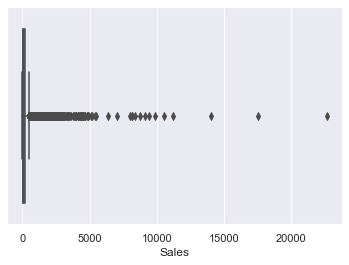

In [43]:
# Detecting outliers in the dataset
sns.boxplot(x = data_1['Sales'])

<AxesSubplot:xlabel='Discount'>

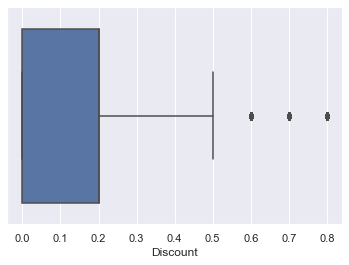

In [44]:
sns.boxplot(x = data_1['Discount'])

<AxesSubplot:xlabel='Profit'>

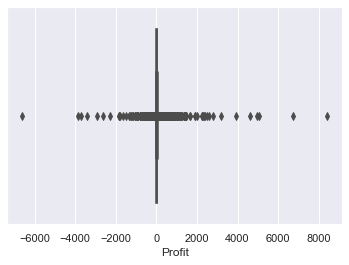

In [45]:
sns.boxplot(x= data_1['Profit'])

In [73]:
# To remove the outliers first we calculate the IQR for each column
Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal Code    67832.00000
Sales             82.87400
Quantity           3.00000
Discount           0.20000
Profit            16.38845
dtype: float64


In [78]:
# Treating the outliers
data_1 = data_1[~((data_1 < (Q1 - 1.5 * IQR)) |(data_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data_1.shape

(6073, 13)

In [85]:
# Seggregating data based on Shipping mode
First_class = data_1[data_1["Ship Mode"] == "First Class"]
Second_class = data_1[data_1["Ship Mode"]== "Second Class"]
Standard_class = data_1[data_1["Ship Mode"]== "Standard Class"]
Same_day = data_1[data_1["Ship Mode"] == "Same Day"]


In [86]:
# Seggregating data based on Segment
Consumer = data_1[data_1["Segment"] == "Consumer"]
Corporate = data_1[data_1["Segment"] == "Corporate"]
Home_office = data_1[data_1["Segment"]== "Home Office"] 

In [88]:
# Computing Average Sales and Profit for different shipping category
print("Average Sales in First Class :", str(First_class.Sales.mean()))
print("Averge Sales in Second Class :" , str(Second_class.Sales.mean()))
print("Average Sales in Same day :", str(Same_day.Sales.mean()))

print("Average Profit in First Class :",str(First_class.Profit.mean()))
print("Average Profit in Second Class :",str(Second_class.Profit.mean()))
print("Average Profit in Same day :",str(Same_day.Profit.mean()))

Average Sales in First Class : 48.03467206823023
Averge Sales in Second Class : 46.12653150457191
Average Sales in Same day : 45.41246865671641
Average Profit in First Class : 10.714001279317687
Average Profit in Second Class : 10.311806400665
Average Profit in Same day : 9.105726865671643


In [89]:
# Computing Average Sales and Profit for different segments
print("Average Sales in Consumer :", str(Consumer.Sales.mean()))
print("Averge Sales in Corporate :" , str(Corporate.Sales.mean()))
print("Average Sales in Home office :", str(Home_office.Sales.mean()))

print("Average Profit in Consumer :",str(Consumer.Profit.mean()))
print("Average Profit in Corporate :",str(Corporate.Profit.mean()))
print("Average Profit in Home_office :",str(Home_office.Profit.mean()))

Average Sales in Consumer : 46.156236795440186
Averge Sales in Corporate : 46.450556215621546
Average Sales in Home office : 44.910271103008206
Average Profit in Consumer : 10.064148258391388
Average Profit in Corporate : 10.051292739273933
Average Profit in Home_office : 10.298955606198723


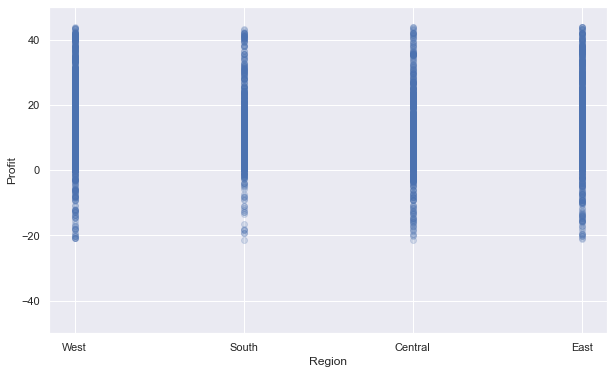

In [147]:
# PLoting distribution of profit against different feautures
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Region"], data_1["Profit"],alpha = 0.2)
ax.set_xlabel('Region')
ax.set_ylabel('Profit')
ax.set_ylim([-50,50])
plt.show()

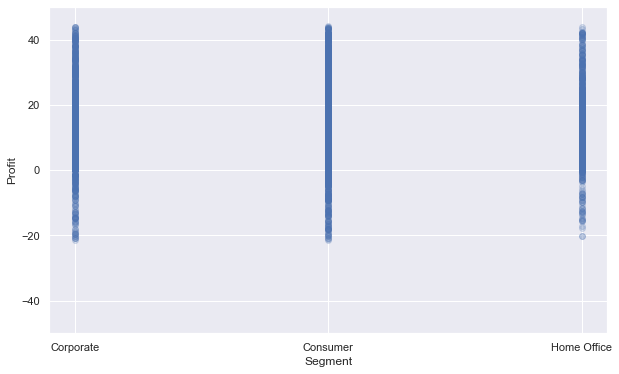

In [148]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Segment"], data_1["Profit"],alpha = 0.2)
ax.set_xlabel('Segment')
ax.set_ylabel('Profit')
ax.set_ylim([-50,50])
plt.show()

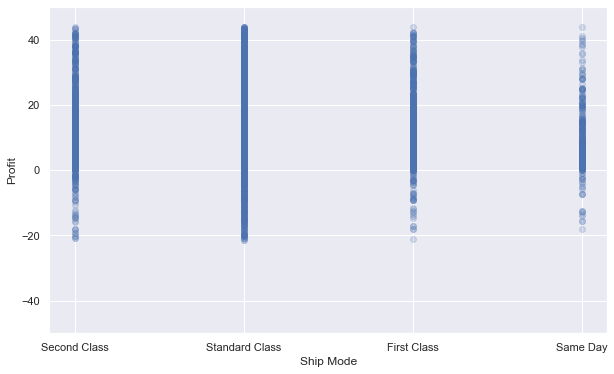

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Ship Mode"], data_1["Profit"],alpha = 0.2)
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Profit')
ax.set_ylim([-50,50])
plt.show()

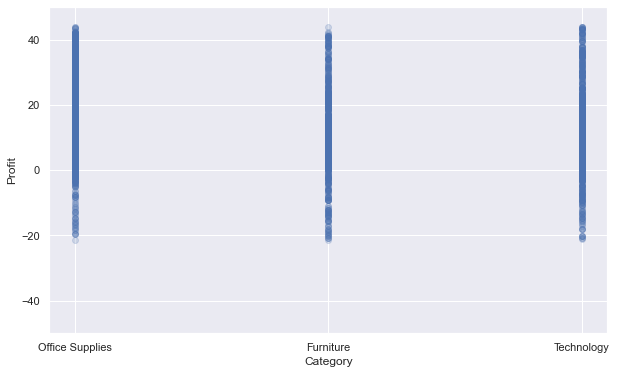

In [150]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Category"], data_1["Profit"],alpha = 0.2)
ax.set_xlabel('Category')
ax.set_ylabel('Profit')
ax.set_ylim([-50,50])
plt.show()

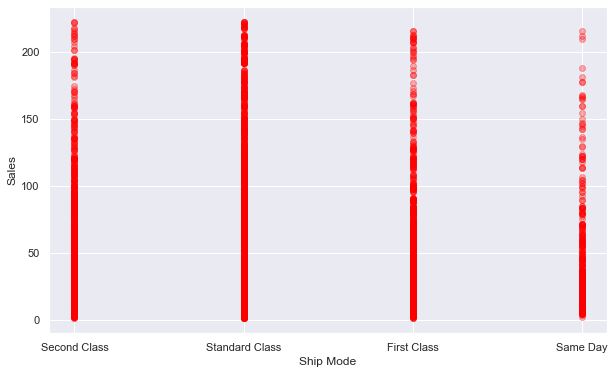

In [138]:
# Ploting the distribution of sales against different features
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Ship Mode"], data_1["Sales"],color = 'red',alpha = 0.3)
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Sales')
plt.show()

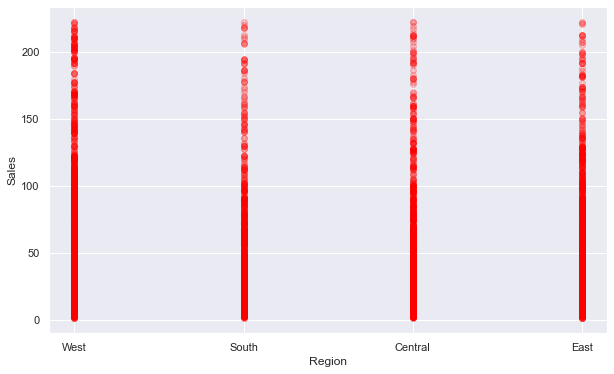

In [151]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Region"], data_1["Sales"],color = 'red',alpha = 0.2)
ax.set_xlabel('Region')
ax.set_ylabel('Sales')
plt.show()

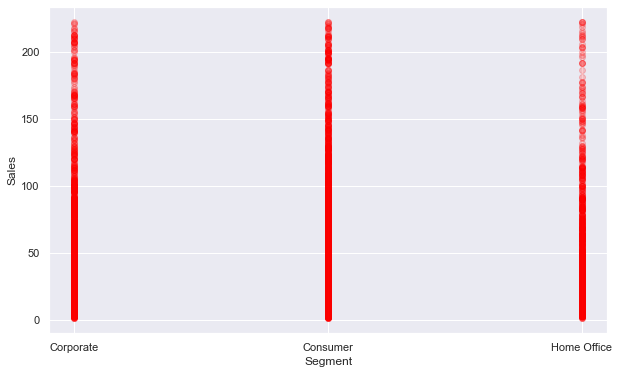

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Segment"], data_1["Sales"],color = 'red',alpha = 0.2)
ax.set_xlabel('Segment')
ax.set_ylabel('Sales')
plt.show()

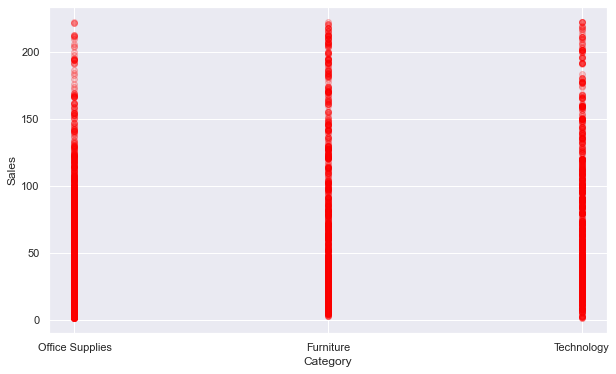

In [153]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_1["Category"], data_1["Sales"],color = 'red',alpha = 0.2)
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
plt.show()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.034662,0.013237,0.057249,-0.018061
Sales,0.034662,1.000000,0.136866,0.077636,0.465970
Quantity,0.013237,0.136866,1.000000,-0.027005,0.263636
Discount,0.057249,0.077636,-0.027005,1.000000,-0.319871
Profit,-0.018061,0.465970,0.263636,-0.319871,1.000000


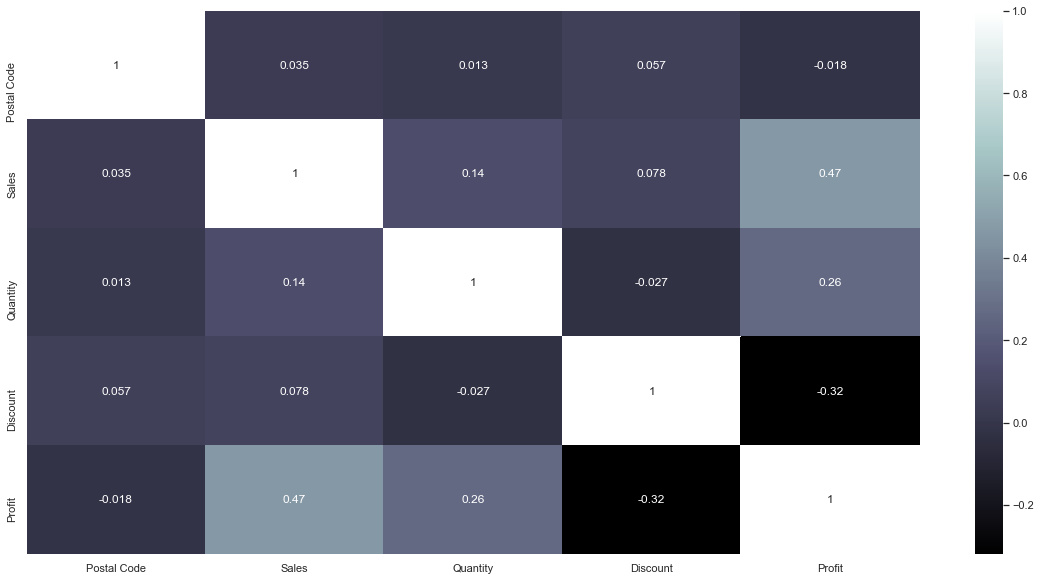

In [108]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data_1.corr()
sns.heatmap(c,cmap="bone",annot=True)
c

In [ ]:
# Profits are lower for products in the consumer category and needs to be imporved.
# Mean Sales and profit are the lowest with the same day delivery option

In [ ]:
# THANK YOU